# Problem 1

(1a) In the univariate two-class case, explain why the Bayes’ classifier minimizes the probability of misclassification
when the true probability density functions are known.


Because we use threshold

# Problem 2
(2a) Implement a univariate Bayesian classifier for discriminating between two normal distributions with means 0 and 1, and standard-deviations 0.5 and 0.5. Assume equal prior probabilities.



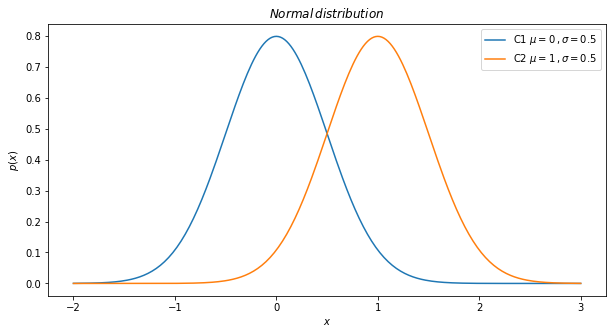

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt



mu = 0
mu2 = 1
sigma = 0.5
sigma2 = 0.5

def normal_dist(minimum, maximum, mu, sigma, smoother = 0, plot = None):
    p = []
    X = np.linspace(minimum, maximum, smoother**5+maximum)
    for x in X:
        result = (1/(m.sqrt(2*m.pi)*sigma))*m.exp(-((x - mu)**2)/(2*sigma**2))
        p.append(result)
    if plot == 'yes':
        plt.plot(X,p)
        plt.line([0.5],[1])
        plt.title("$Normal\,distribution, \mu = %s , \sigma = %s$"%(mu, sigma))
        plt.ylabel('$p(x)$')
        plt.xlabel('$x$')
        plt.show()
    else:
        return X,p
        
    

dist_1 = normal_dist(-2, 3, mu, sigma, smoother = 3)
dist_2 = normal_dist(-2, 3, mu2, sigma2, smoother = 3)

plt.figure(figsize = (10,5))
plt.plot(dist_1[0],dist_1[1], label = 'C1 $\mu = %s\, , \sigma = %s$'%(mu, sigma))
plt.plot(dist_2[0],dist_2[1], label = 'C2 $\mu = %s\, ,\sigma = %s$'%(mu2, sigma2))

plt.title("$Normal\,distribution$")
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()


def bayes_classifier(data):
    prior_prob_C1 = 1/2 #P(C = 1)
    prior_prob_C2 = 1/2 #P(C = 0)
    #Sum yields 1
    Classifer_array = []
    value = []
    post_test = []
    mu = 0
    mu2 = 1
    sigma = 0.5
    sigma2 = 0.5
    for x in data:
        #P(x|C_i)
        likelyhood_C1 = (1/(m.sqrt(2*m.pi)*sigma))*m.exp(-((x - mu)**2)/(2*sigma**2))
        likelyhood_C2 = (1/(m.sqrt(2*m.pi)*sigma2))*m.exp(-((x - mu2)**2)/(2*sigma2**2))
        
        evidence = likelyhood_C1*prior_prob_C1 + likelyhood_C2*prior_prob_C2 #sum of likelyhood*prior prob
        
        posterior_prob1 = prior_prob_C1*likelyhood_C1/evidence #Posterior class 1
        posterior_prob2 = prior_prob_C2*likelyhood_C2/evidence #Posterior class 2
        post_test.append(posterior_prob1)
#         posterior_prob1 = (x-mu)**2
#         posterior_prob2 = (x-mu2)**2
        #Bayes Classifier
        if posterior_prob1 > posterior_prob2:
            Classifer_array.append(1)
            value.append("%.3f belongs to class C1"%float(x))
        else:
            Classifer_array.append(0)
            value.append("%.3f belongs to class C2"%float(x))
    
    return [Classifer_array,value,post_test]



(2b) Generate 1000 samples from each of the distributions, and classify these using your implementation.
Calculate the confusion matrix, and plot the histograms of the samples. Illustrate the decision boundary
together with the histograms. Are all points correctly classified? Why/why not?

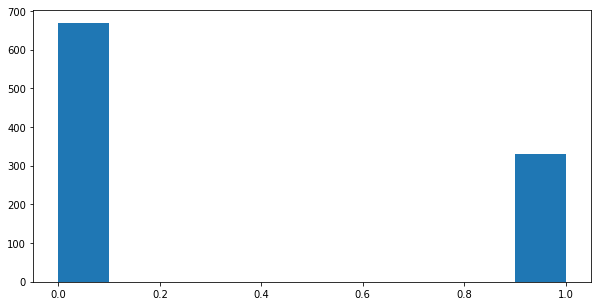

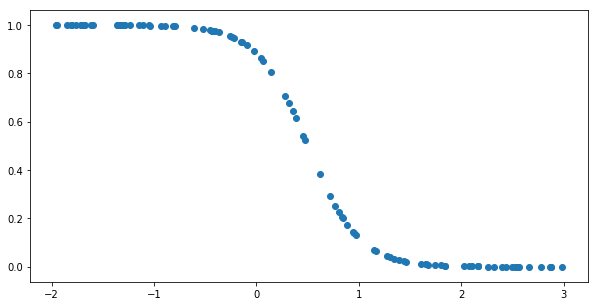

In [2]:
import seaborn as sns


dataset = np.random.randint(0,3, 1000)


plt.figure(figsize = (10,5))
plt.hist(bayes_classifier(dataset)[0])
plt.show()
# for i in bayes_classifier(dataset1,dataset2)[1]:
#     print(f'{i}')

dataset1 = np.random.uniform(-2, 3,100)
plt.figure(figsize = (10,5))
plt.scatter(dataset1,bayes_classifier(dataset1)[2])
plt.show()


(2c) Generate 1000 samples from a Unif(−0.87, 0.87) distribution, and 1000 samples from a Unif(0.13, 1.87).
Classify these samples using the same classifier as above. Calculate the accuracy, and compare it with the
previous result. You should see a drop in accuracy, even though the mean and standard-deviation of the
sampling distributions are equal. Why is this the case?

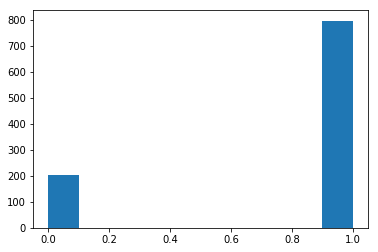

Accuracy:  0.797
Accuracy:  0.784


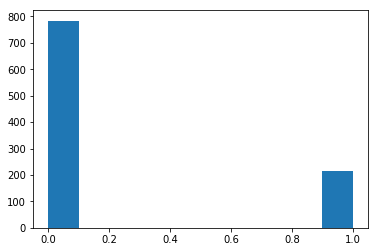

In [3]:
import numpy as np


new_dataset1 = np.random.uniform(-0.87, 0.87,1000)
new_dataset2 = np.random.uniform(0.13, 1.87,1000)

# def normalized(lst, mu, sigma):
#     normal_listed = []
#     for x in lst:
#         normal_listed.append((1/(m.sqrt(2*m.pi)*sigma))*m.exp(-((x - mu)**2)/(2*sigma**2)))
#     return normal_listed


plt.hist(bayes_classifier(new_dataset1)[0])
plt.show()

summed = 0
for i in bayes_classifier(new_dataset1)[0]:

    if i > 0:
        summed += 1
print('Accuracy: ',summed/len(bayes_classifier(new_dataset1)[0]))
summed = 0
for i in bayes_classifier(new_dataset2)[0]:

    if i == 0:
        summed += 1
print('Accuracy: ',summed/len(bayes_classifier(new_dataset2)[0]))



plt.hist(bayes_classifier(new_dataset2)[0])
plt.show()






# Problem 3
Assume we have an independent identically distributed (iid). Sample X1, X2, . . . , Xn from the exponential
density. The probability density function is given by

$p(x) = (1/\beta) e^{-z/\beta} ,\, x > 0,\, \beta > 0 $

(3a) Compute E(X)


In [4]:
#E(X) = int-> infinity xf(x)
import math
from scipy import integrate

lam = 2

exp = lambda x: x*lam*math.exp(-lam*x)  #Lambda = 2
    
print("E(X) = %s, "%integrate.quad(exp, 0, 200)[0] + 'Expected = 1/%s = %s'%(lam,1/lam))  #Alternative simpsons method, integration by parts numerical




E(X) = 0.5, Expected = 1/2 = 0.5


(3b) Show that the Maximum Likelihood estimator for β is

# Problem 4
The data file global-temperatures.csv contains the average global annual temperatures spanning from the
year 1880 to 2017.

(4a) Use the file from canvas and perform linear regression, with temperature as a function of years, and plot
the results.


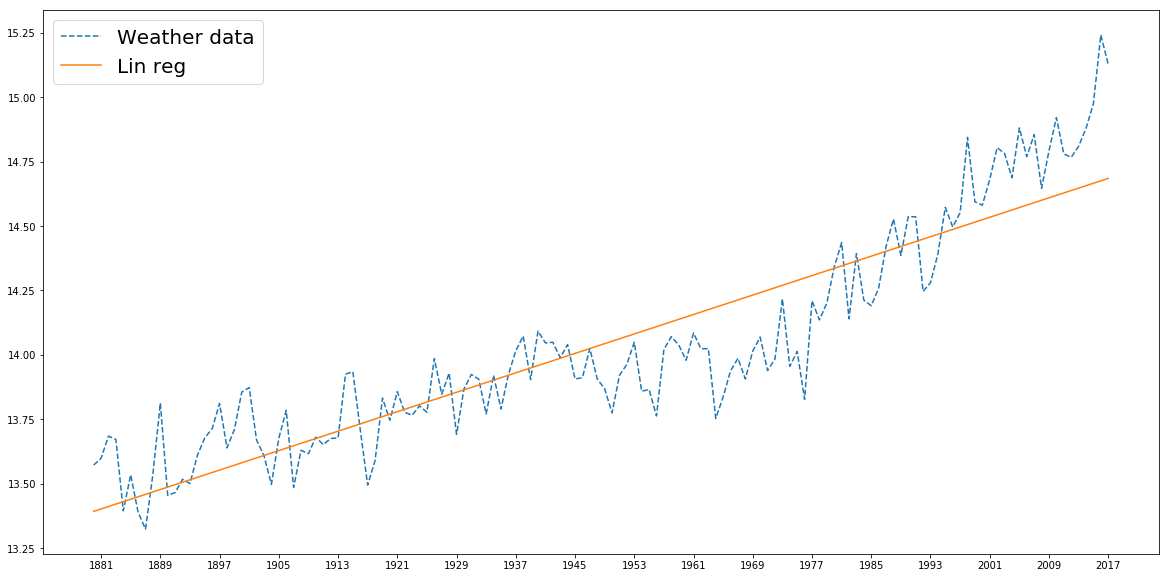

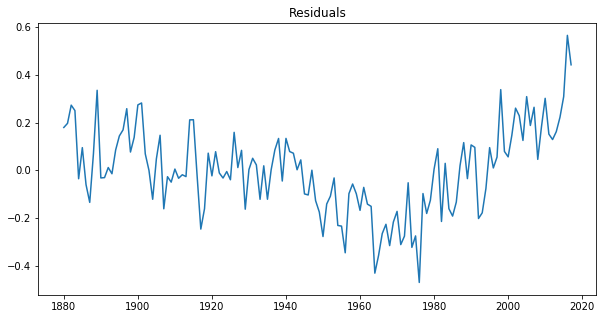

R^2 =  0.814543607533


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


glob_temp = pd.read_csv('globalltemperatures.csv')

dataset = glob_temp.iloc[6:,0:1].values


dataset_made = [i for i in dataset]
    

time = []
value = []
for i in dataset_made:
    time.append(i[0][:4])
    value.append(i[0][5:])
    
value = [float(i) for i in value]
time = [int(i) for i in time]
x = [i for i in range(len(time))]

# a,b = np.polyfit(x,value, deg = 1)
# print(a,b)

time2 = np.array(x)
value2 = np.array(value)

N = len(time2)
summ_val = np.sum(time2)
summed2 = np.sum(time2**2)

#Linear regression using vectors, see book page 79.
A = np.array([[N, summ_val],[summ_val, summed2]])
y = np.array([[np.sum(value2)],[np.sum(value2*time2)]])

w = np.linalg.inv(A)@y

a = w[1]
b = w[0]



y_regline = np.array([a*i + b for i in x])


ticks_spacing = [i for i in range(1881,2018,8)]

plt.figure(figsize = (20,10))

plt.plot(time, value,'--' , label = "Weather data")
plt.plot(time, y_regline,label = "Lin reg")
plt.xticks(ticks_spacing)
plt.legend(loc = 'best', prop={'size': 20})


plt.show()


resid = []

for i,j in zip(value,y_regline):
    resid.append(abs(i)-abs(j))




plt.figure(figsize = (10,5))    
plt.title("Residuals")
plt.plot(time,resid)
plt.show()

value_nump = np.array(value)


resid = np.array(resid)
SSres = sum(resid**2)[0]
SStot = sum((value_nump - np.mean(value_nump))**2)

R_Sqr = 1 - SSres/SStot

print('R^2 = ',R_Sqr)



# Problem 5
In this exercise we are going to use the bayesian classifier to classify whether a person has a low or higheducation based on their salary. Use the fileeducation-salary.csv. The file contains two columns. Thefirst has number,andwhich corresponds to education levels:: elementary and junior high school(grunnskole),: High school (videregående) and: phD. The second column is the average monthly salaryfor an unspecified industry.

(1a)Make box plots and histograms for the three education levels.

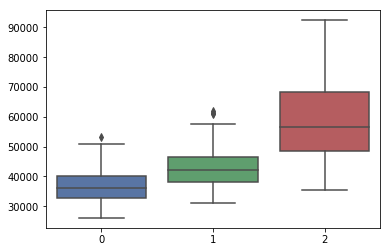

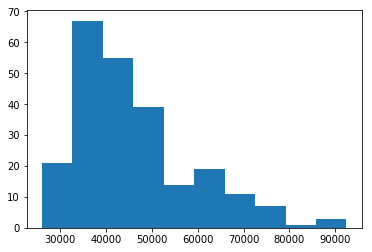

The shape is bell-curved and we can assume a gaussian dataset


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


education = pd.read_csv('education-salary.txt')

dataset_made = education.loc[:,:].values


sal = []
edu = []


for i in dataset_made:
    edu.append(i[0][:1])
    sal.append(i[0][2:])

sal = [float(i) for i in sal]
edu = [int(i) for i in edu]  


sns.boxplot(x = edu, y = sal, palette="deep")
plt.show()



plt.hist(sal)
plt.show()
print('The shape is bell-curved and we can assume a gaussian dataset')


# (b)Derive the expression for the log likelihood functionL(μ0|x)

# (c)Derive the MLE estimate for μ0(assuming knownσ=σ0).

## Assume that the income at elementary school level (0),X0, are normally distributed:X0∼N(μ0,σ0)

# (d)Derive an expression for the maximum a posteriori estimate, (μMAP), for the mean in monthly salaries forthe elementary (0th) level. Calculate the numerical value based on the data.

# (e)Assuming that the incomes are normal distributed, implement a function that classifies which educationlevel a person has based on a salary. You can use the MLE estimators as parameters in the normaldistribution.

With posterior prob:  0.7875
Assume no posterior prob:  0.7875
With posterior prob:  0.49382716049382713
Assume no posterior prob:  0.48148148148148145
With posterior prob:  0.6578947368421053
Assume no posterior prob:  0.6578947368421053
Difference class 1:  0.0
Difference class 2:  0.012345679012345678
Difference class 3:  0.0


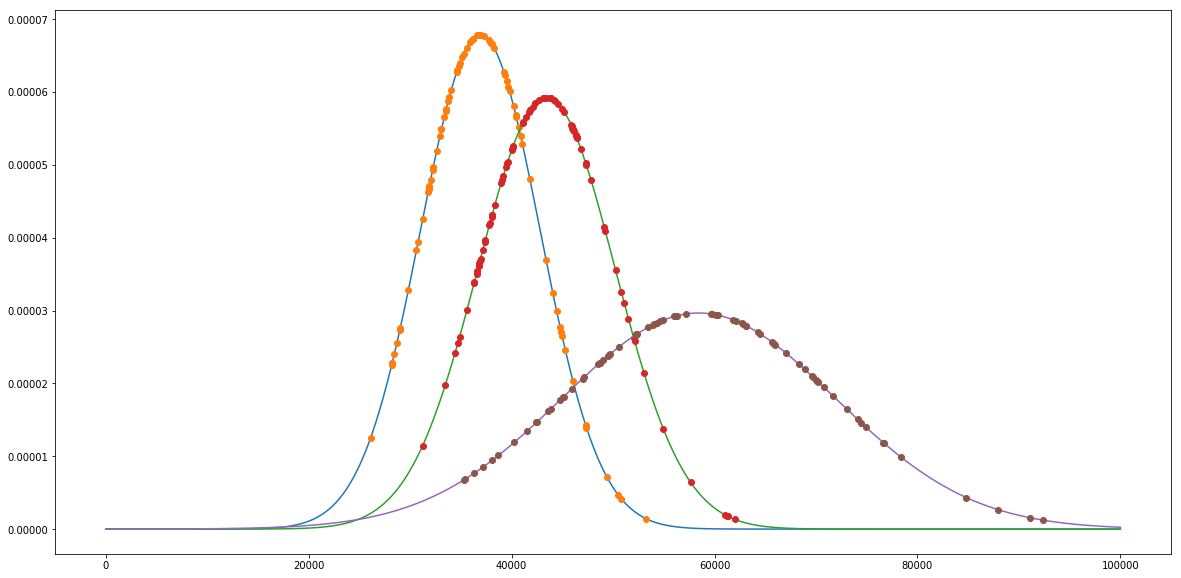

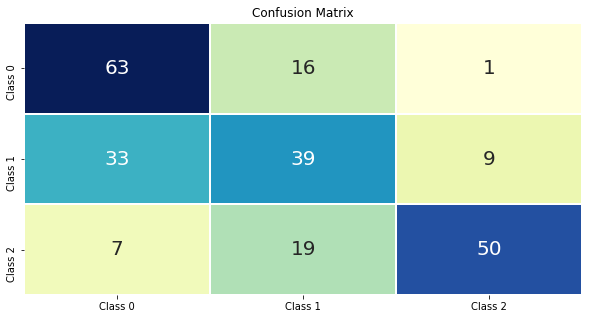

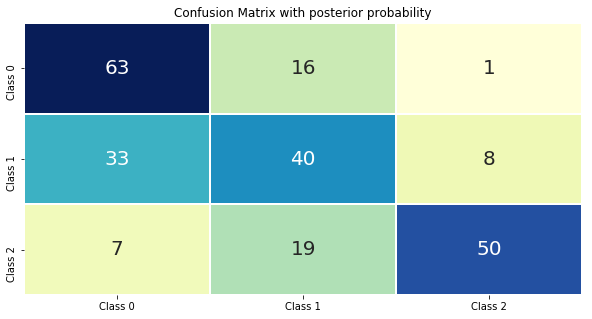

In [7]:
import math as m
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


education = pd.read_csv('education-salary.txt')


dataset_made = education.loc[:,:].values


sal = []
edu = []

for i in dataset_made:
    edu.append(i[0][:1])
    sal.append(i[0][2:])

sal = [float(i) for i in sal]
edu = [int(i) for i in edu]   


dist_list_sal_0 = []
dist_list_sal_1 = []
dist_list_sal_2 = []


for i,j in zip(edu,sal):
    if i == 0:
        dist_list_sal_0.append(j)
    if i == 1:
        dist_list_sal_1.append(j)
    if i == 2:
        dist_list_sal_2.append(j)

        
        
#posterioris
post0 = len(dist_list_sal_0)/(len(dist_list_sal_0)+len(dist_list_sal_1)+len(dist_list_sal_2))
post1= len(dist_list_sal_1)/(len(dist_list_sal_0)+len(dist_list_sal_1)+len(dist_list_sal_2))
post2 = len(dist_list_sal_2)/(len(dist_list_sal_0)+len(dist_list_sal_1)+len(dist_list_sal_2))


x_ = np.linspace(min(dist_list_sal_0),max(dist_list_sal_0),2000)


def gaussinate(x):
    p = []
    p_ = []
    m_sal = np.mean(x)
    s = np.std(x)
    x_ = np.linspace(0,100000,2000)
    for x_da in x_:
        result = (1/(m.sqrt(2*m.pi)*s))*m.exp(-((x_da - m_sal)**2)/(2*s**2))
        p.append(result)
        
    for x_d in x:
        result = (1/(m.sqrt(2*m.pi)*s))*m.exp(-((x_d - m_sal)**2)/(2*s**2))
        p_.append(result)
    plt.plot(x_,p)
    plt.plot(x,p_, 'o')
    
    
def classifiering(x,classs):
    m0 = np.mean(dist_list_sal_0)
    s_0 = np.std(dist_list_sal_0)
    m1 = np.mean(dist_list_sal_1)
    s_1 = np.std(dist_list_sal_1)
    m2 = np.mean(dist_list_sal_2)
    s_2 = np.std(dist_list_sal_2)
    
    classes_post = []
    classes = []
    
    #Classify with np.log(C_i) = 0 assume no a priori knowledge
    for x_ in x:
        g_0 = -np.log(s_0) - ((x_-m0)**2/(2*s_0**2)) #+ post0
        g_1 = -np.log(s_1) - ((x_-m1)**2/(2*s_1**2)) #+ post1
        g_2 = -np.log(s_2) - ((x_-m2)**2/(2*s_2**2)) #+ post2
        
        g_0_post = -np.log(s_0) - ((x_-m0)**2/(2*s_0**2)) + post0
        g_1_post = -np.log(s_1) - ((x_-m1)**2/(2*s_1**2)) + post1
        g_2_post = -np.log(s_2) - ((x_-m2)**2/(2*s_2**2)) + post2
        
        if g_0 > g_1 and g_0 > g_2:
            classes.append(0)
        elif g_1 > g_0 and g_1 > g_2:
            classes.append(1)
        elif g_2 > g_0 and g_2 > g_1:
            classes.append(2)
        
        if g_0_post > g_1_post and g_0_post > g_2_post:
            classes_post.append(0)
        elif g_1_post > g_0_post and g_1_post > g_2_post:
            classes_post.append(1)
        elif g_2_post > g_0_post and g_2_post > g_1_post:
            classes_post.append(2)
    cl = [i for i in classes_post if i == classs]
    cl1 = [i for i in classes if i == classs]
    return classes,len(cl)/len(x),len(cl1)/len(x),cl1,cl
        


print("With posterior prob: ",classifiering(dist_list_sal_0, 0)[1])
print('Assume no posterior prob: ',classifiering(dist_list_sal_0, 0)[2])
print("With posterior prob: ",classifiering(dist_list_sal_1, 1)[1])
print('Assume no posterior prob: ',classifiering(dist_list_sal_1, 1)[2])
print("With posterior prob: ",classifiering(dist_list_sal_2, 2)[1])
print('Assume no posterior prob: ',classifiering(dist_list_sal_2, 2)[2])

print('Difference class 1: ',(classifiering(dist_list_sal_0, 0)[1]-classifiering(dist_list_sal_0, 0)[2]))
print('Difference class 2: ',(classifiering(dist_list_sal_1, 1)[1]-classifiering(dist_list_sal_1, 1)[2]))
print('Difference class 3: ',(classifiering(dist_list_sal_2, 2)[1]-classifiering(dist_list_sal_2, 2)[2]))

plt.figure(figsize = (20,10))

gaussinate(dist_list_sal_0)

gaussinate(dist_list_sal_1)

gaussinate(dist_list_sal_2)

plt.show()


sum_real_0 = len(dist_list_sal_0)
sum_class_0 = len(classifiering(dist_list_sal_0, 0)[0])

sum_real_1 = len(dist_list_sal_1)
sum_class_1 = len(classifiering(dist_list_sal_1, 1)[0])

sum_real_2 = len(dist_list_sal_2)
sum_class_2 = len(classifiering(dist_list_sal_2, 2)[0])


C0_0 = len(classifiering(dist_list_sal_0, 0)[3])
C0_1 = len(classifiering(dist_list_sal_0, 1)[3])
C0_2 = len(classifiering(dist_list_sal_0, 2)[3])

C1_0 = len(classifiering(dist_list_sal_1, 0)[3])
C1_1 = len(classifiering(dist_list_sal_1, 1)[3])
C1_2 = len(classifiering(dist_list_sal_1, 2)[3])

C2_0 = len(classifiering(dist_list_sal_2, 0)[3])
C2_1 = len(classifiering(dist_list_sal_2, 1)[3])
C2_2 = len(classifiering(dist_list_sal_2, 2)[3])


#With posterior probability
C0_0_post = len(classifiering(dist_list_sal_0, 0)[4])
C0_1_post = len(classifiering(dist_list_sal_0, 1)[4])
C0_2_post = len(classifiering(dist_list_sal_0, 2)[4])

C1_0_post = len(classifiering(dist_list_sal_1, 0)[4])
C1_1_post = len(classifiering(dist_list_sal_1, 1)[4])
C1_2_post = len(classifiering(dist_list_sal_1, 2)[4])

C2_0_post = len(classifiering(dist_list_sal_2, 0)[4])
C2_1_post = len(classifiering(dist_list_sal_2, 1)[4])
C2_2_post = len(classifiering(dist_list_sal_2, 2)[4])


array = [[C0_0, C0_1 ,C0_2], 
        [C1_0,C1_1,C1_2],
        [C2_0,C2_1,C2_2]]
df_cm = pd.DataFrame(array, index = [i for i in ["Class 0","Class 1", "Class 2"]],
                  columns = [i for i in ["Class 0","Class 1", "Class 2"]])

plt.figure(figsize = (10,5))
sn.heatmap(df_cm, linewidths=1 , cmap="YlGnBu",cbar=False, annot=True, annot_kws={"size": 20})#,vmin=0, vmax=0
plt.title('Confusion Matrix')
plt.show()


array = [[C0_0_post, C0_1_post ,C0_2_post], 
        [C1_0_post,C1_1_post,C1_2_post],
        [C2_0_post,C2_1_post,C2_2_post]]
df_cm = pd.DataFrame(array, index = [i for i in ["Class 0","Class 1", "Class 2"]],
                  columns = [i for i in ["Class 0","Class 1", "Class 2"]])

plt.figure(figsize = (10,5))
sn.heatmap(df_cm, linewidths=1 , cmap="YlGnBu",cbar=False, annot=True, annot_kws={"size": 20})#,vmin=0, vmax=0
plt.title('Confusion Matrix with posterior probability')
plt.show()

Priori klasse 0: 0.33755274261603374
Priori klasse 1: 0.34177215189873417
Priori klasse 2: 0.3206751054852321
36912.6666638
43441.1522704
58433.5087658
34591544.9024
45379001.4042
180922713.751


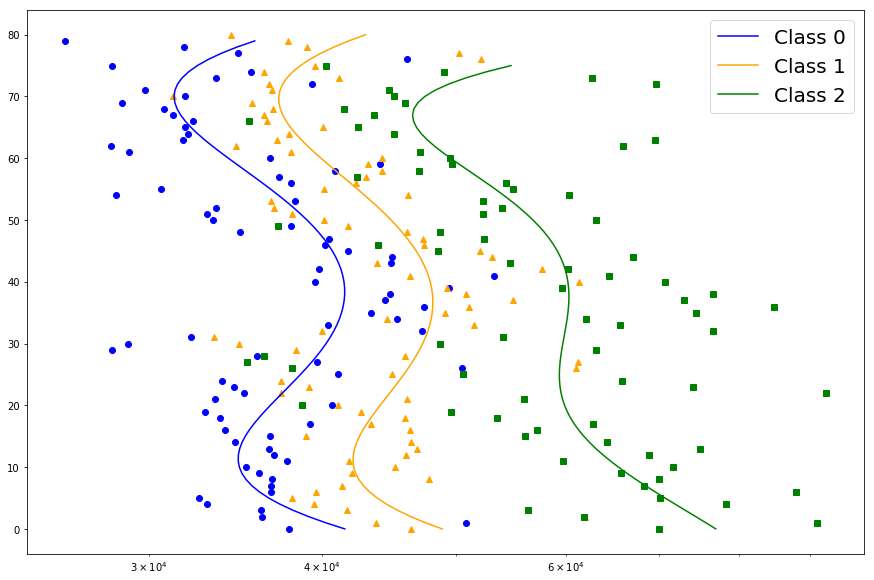

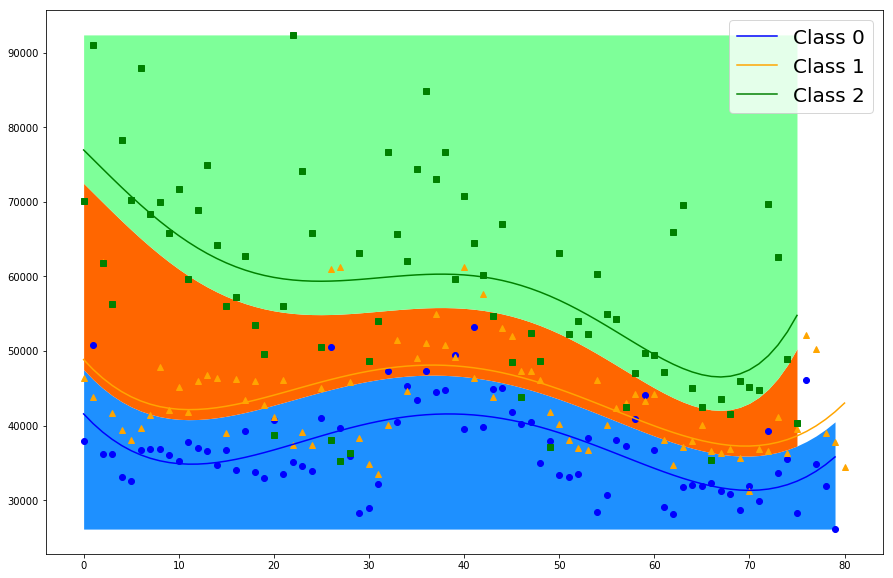

In [8]:
import math as m
import pandas as pd

dist_list_sal_0 = []
dist_list_sal_1 = []
dist_list_sal_2 = []


for i,j in zip(edu,sal):
    if i == 0:
        dist_list_sal_0.append(j)
    if i == 1:
        dist_list_sal_1.append(j)
    if i == 2:
        dist_list_sal_2.append(j)

    
# print('Edu 0:',min(dist_list_sal_0))
# print('Edu 1:',min(dist_list_sal_1))
# print('Edu 2:',min(dist_list_sal_2))


length0 = len(dist_list_sal_0)
length1 = len(dist_list_sal_1)
length2 = len(dist_list_sal_2)
total = length0 + length1 + length2

print('Priori klasse 0:',length0/total)
print('Priori klasse 1:',length1/total)
print('Priori klasse 2:',length2/total)

print(np.mean(dist_list_sal_0))
print(np.mean(dist_list_sal_1))
print(np.mean(dist_list_sal_2))
print(np.var(dist_list_sal_0))
print(np.var(dist_list_sal_1))
print(np.var(dist_list_sal_2))





# dist_list_sal_0 = np.array(dist_list_sal_0)
# dist_list_sal_1 = np.array(dist_list_sal_1)



def classify(x):
    classified = []

    
    mean_c0 = 36913
    mean_c1 = 43441
    mean_c2 = 58434
    var_c0 = m.sqrt(34591545)
    var_c1 = m.sqrt(45379001)
    var_c2 = m.sqrt(180922713)
    
    if type(x) == type([]):
        for x_ in x:
            result0 = (1/(m.sqrt(2*m.pi)*var_c0))*m.exp(-((x_ - mean_c0)**2)/(2*var_c0**2))
            result1 = (1/(m.sqrt(2*m.pi)*var_c1))*m.exp(-((x_ - mean_c1)**2)/(2*var_c1**2))
            result2 = (1/(m.sqrt(2*m.pi)*var_c2))*m.exp(-((x_ - mean_c2)**2)/(2*var_c2**2))
            

            if result0 >= result1 and result0 >= result2:
                classified.append(0)
            if result1 >= result0 and result1 >= result2:
                classified.append(1)
            if result2 >= result1 and result2 >= result0:
                classified.append(2)
#             else:
#                 print("Error")

    else:
        result0 = (1/(m.sqrt(2*m.pi)*var_c0))*m.exp(-((x - mean_c0)**2)/(2*var_c0**2))
        result1 = (1/(m.sqrt(2*m.pi)*var_c1))*m.exp(-((x - mean_c1)**2)/(2*var_c1**2))
        result2 = (1/(m.sqrt(2*m.pi)*var_c2))*m.exp(-((x - mean_c2)**2)/(2*var_c2**2))
        
        print(result0)
        print(result1)
        print(result2)
        
        if result0 > result1 and result0 > result2:
            classified.append(0)
        if result1 > result0 and result1 > result2:
            classified.append(1)
        if result2 > result1 and result2 > result0:
            classified.append(2)
#         else:
#             print("Error")
            

    return classified


x0 = [i for i in range(len(dist_list_sal_0))]
x1 = [i for i in range(len(dist_list_sal_1))]
x2 = [i for i in range(len(dist_list_sal_2))]


poly0 = np.polyfit(x0,dist_list_sal_0, deg = 4)
poly1 = np.polyfit(x1,dist_list_sal_1, deg = 5)
poly2 = np.polyfit(x2,dist_list_sal_2, deg = 5)

y_regline0 = [(poly0[0]*i**4 + poly0[1]*i**3 + poly0[2]*i**2 + poly0[3]*i + poly0[4]) for i in x0]
y_regline1 = [(poly1[0]*i**5 + poly1[1]*i**4 + poly1[2]*i**3 + poly1[3]*i**2 + poly1[4]*i + poly1[5]) for i in x1]
y_regline2 = [(poly2[0]*i**5 + poly2[1]*i**4 + poly2[2]*i**3 + poly2[3]*i**2 + poly2[4]*i + poly2[5]) for i in x2]



data = {'x0':x0,'dist':dist_list_sal_0}

data = pd.DataFrame(data=data)


plt.figure(figsize = (15,10))
plt.plot(dist_list_sal_0,x0,'o',color = 'blue')
plt.plot(dist_list_sal_1,x1, '^',color = 'orange')
plt.plot(dist_list_sal_2,x2, 's',color = 'green')



plt.plot(y_regline0,x0,color = 'blue', label = 'Class 0')
plt.plot(y_regline1,x1,color = 'orange', label = 'Class 1')
plt.plot(y_regline2,x2,color = 'green', label = 'Class 2')
plt.xscale('log')
plt.legend(loc = 'best', prop={'size': 20})
plt.show()







x0 = np.array(x0)
y_regline0 = np.array(y_regline0)
x1 = np.array(x1)
y_regline1 = np.array(y_regline1)
x2 = np.array(x2)
y_regline2 = np.array(y_regline2)


plt.figure(figsize = (15,10))

plt.plot(x0,dist_list_sal_0, 'o',color = 'blue')
plt.plot(x1,dist_list_sal_1, '^',color = 'orange')
plt.plot(x2,dist_list_sal_2, 's',color = 'green')


plt.plot(x0,y_regline0,color = 'blue', label = 'Class 0')
plt.fill_between(x0, min(dist_list_sal_0) ,y_regline1[:-1]-m.sqrt(45379001)/5,
    alpha=1, edgecolor='#3F7F4C', facecolor='#1E90FF',
    linewidth=0)

plt.plot(x1,y_regline1,color = 'orange', label = 'Class 1')
plt.fill_between(x1[:-5], y_regline1[:-5]-m.sqrt(45379001)/5,y_regline2-m.sqrt(180922713)/3,
    alpha=1, edgecolor='#3F7F4C', facecolor='#FF6600',
    linewidth=0)


plt.plot(x2,y_regline2,color = 'green', label = 'Class 2')
plt.fill_between(x2, y_regline2-m.sqrt(180922713)/3, max(dist_list_sal_2),
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)
plt.legend(loc = 'best', prop={'size': 20})
plt.show()







In [9]:
x = [0.5,0.1,0.3]
cla = [1,0,0]
result = []

for i,j in zip(x,cla):
    result.append((i,j))
    
print(result)



[(0.5, 1), (0.1, 0), (0.3, 0)]


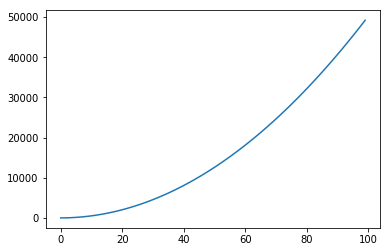

In [10]:
import matplotlib.pyplot as plt



plt.plot([(5*i**2 + 2*i + 5) for i in range(0,100)])
plt.show()

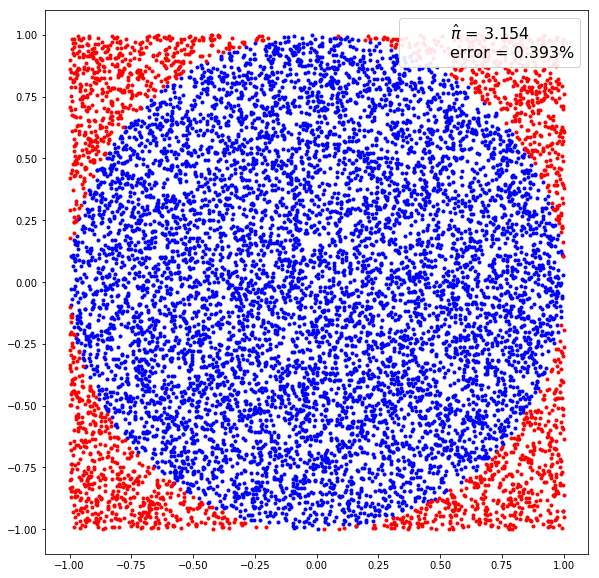

In [11]:
import numpy as np
import matplotlib.pyplot as plt

 
N = 10000
x, y = np.random.uniform(-1, 1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*4/N
error = abs((pi - np.pi)/pi)* 100
outside = np.invert(inside)
plt.figure(figsize = (10,10))
plt.plot(x[inside], y[inside], 'b.')
plt.plot(x[outside], y[outside], 'r.')
plt.plot(0, 0, label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi, error), alpha=0)

plt.axis('square')
plt.legend(frameon=True, framealpha=0.9, fontsize=16);
plt.show()